<a href="https://colab.research.google.com/github/PatilTanmay512/Shacks_Lab_Assignment/blob/main/Shacks__Lab_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as svm
import seaborn as sns

In [ ]:
data = pd.read_excel("/content/DS - Assignment Part 1 Cleaned data set.xlsx")
df = pd.DataFrame(data = data)
df.describe()

,Transaction Year,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.0,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2012.0,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.0,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.0,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.0,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2012.0,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2012.0,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2012.0,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [ ]:
df.shape

(414, 9)

## EDA

Transaction Year
2012    414
Name: Transaction Year, dtype: int64


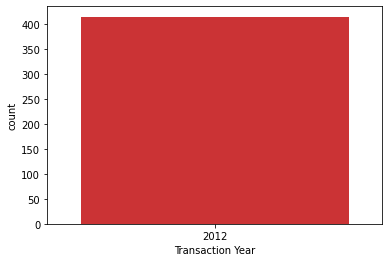

In [ ]:
print('Transaction Year')
print(df["Transaction Year"].value_counts())
sns.countplot(x='Transaction Year', data = df , palette = 'Set1' )

In [ ]:
df = df.drop(['Transaction Year'], axis = 1)
df

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 3.2 MB/s 


In [ ]:
import sweetviz as sv

report = sv.analyze(df)

report.show_html("./report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report ./report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


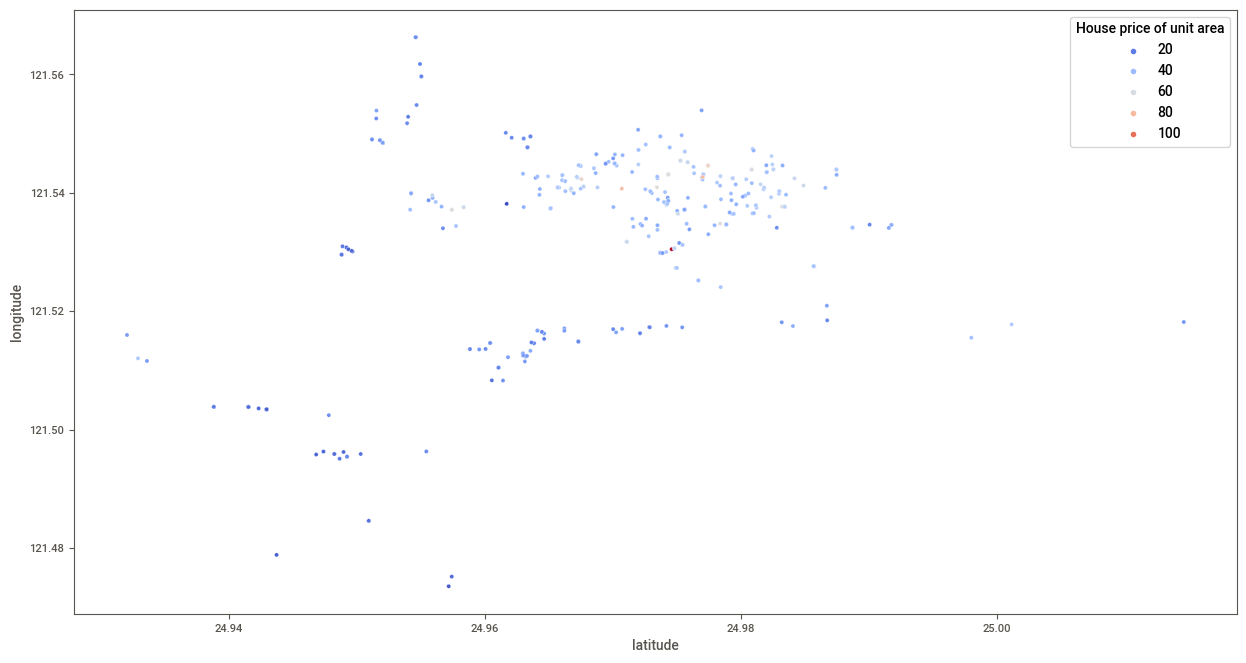

In [ ]:
plt.figure(figsize = (15,8))
sns.scatterplot(x="latitude", y="longitude", data = df, hue = "House price of unit area", palette="coolwarm")

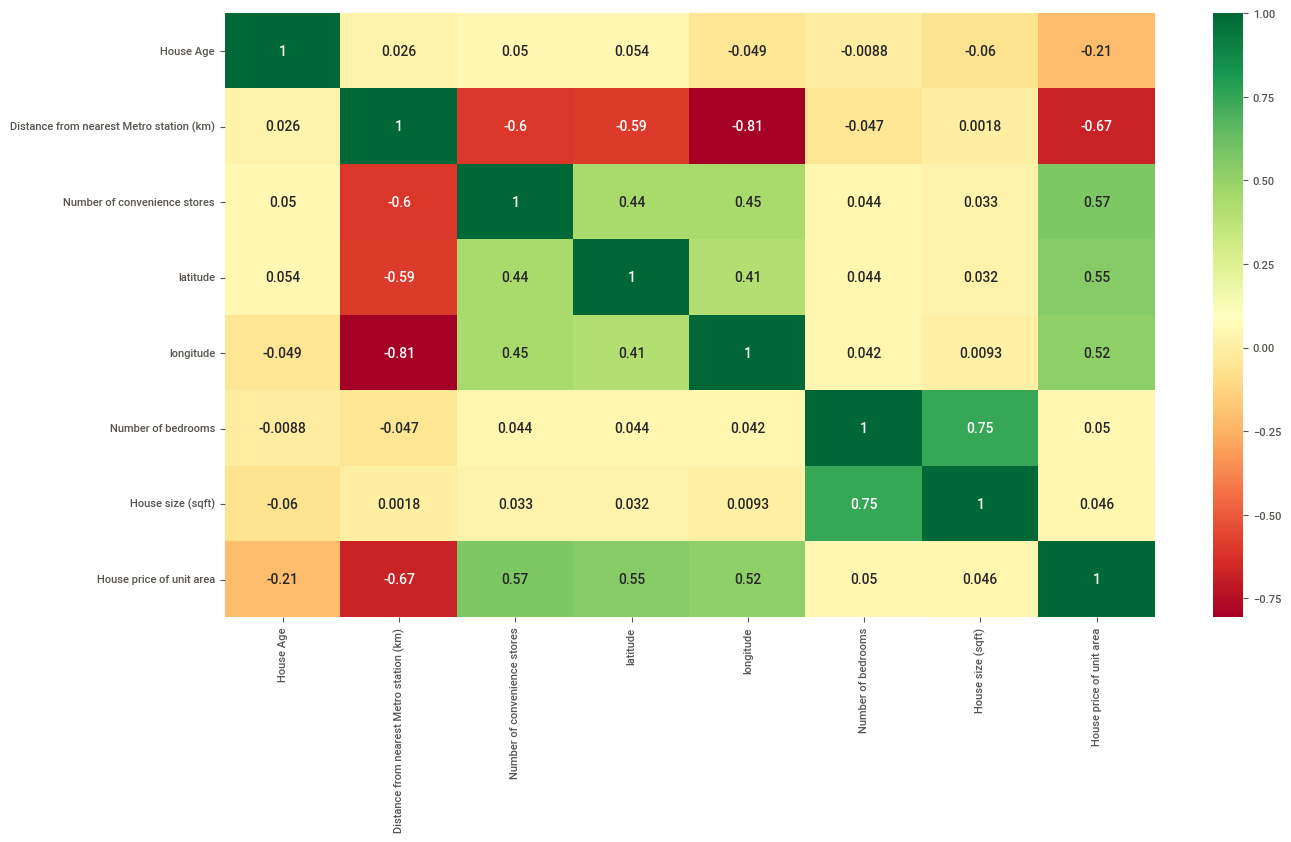

In [ ]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot =True, cmap = 'RdYlGn')

In [ ]:
df.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


## Model Fitting

In [ ]:
# Dependent Variable

y = df.iloc[:,-1].values

df.drop(labels=['House price of unit area'], axis = 1, inplace = True)

x = df.iloc[:,:]

#### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

####Linear Regression

In [ ]:
#Importing Model

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Model Prediction

y_predict = reg.predict(x_test)

In [ ]:
#Model Accuracy

from sklearn.metrics import r2_score

r2_score(y_test, y_predict)*100

66.09193551671663

In [ ]:
# Adding Own Data

inp = np.array([18, 280, 8, 24.9798, 121.5395, 2, 1200])
inp = inp.reshape((1, -1))
reg.predict(inp)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([48.81320767])

## Random Forest

In [ ]:
# Importing Model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
# Model Prediction

y_pred = model.predict(x_test)

In [ ]:
# Model Accuracy

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)*100

79.88881670070789

In [ ]:
# Adding Own Data

inp = np.array([18, 280, 8, 24.9798, 121.5395, 2, 1200])
inp = inp.reshape((1, -1))
model.predict(inp)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([44.037])